In [43]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pysqldf import SQLDF

In [5]:
verra_df = pd.read_csv('../Data/VCU_Registry_Result_V2_5.2.22 copy.csv',
                      parse_dates = ['Issuance Date', 'Retirement/Cancellation Date', 'Vintage Start', 'Vintage End'])

/Users/charlielosche/miniforge3/envs/enf_tf/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '29/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/charlielosche/miniforge3/envs/enf_tf/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '28/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/charlielosche/miniforge3/envs/enf_tf/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '27/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/charlielosche/miniforge3/envs/enf_tf/lib/python3.9/site-packages/p

In [6]:
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details
0,2022-04-29,NaN,2020-01-11,2020-12-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
1,2022-04-29,NaN,2021-01-01,2021-08-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
2,2022-04-29,NaN,2020-08-28,2020-12-31,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
3,2022-04-29,NaN,2021-01-01,2021-09-30,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
4,2022-04-29,NaN,2016-01-01,2016-12-31,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-1...,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...,NaT,NaN,NaN,NaN


First, cleaning column names

In [7]:
#getting rid of spaces and slashes
verra_df.columns = verra_df.columns.str.replace("\/| |\.", '_', regex = True)

verra_df.columns = verra_df.columns.str.lower()

In [8]:
verra_df.columns

Index(['issuance_date', 'sustainable_development_goals', 'vintage_start',
       'vintage_end', 'id', 'name', 'country', 'project_type', 'methodology',
       'total_vintage_quantity', 'quantity_issued', 'serial_number',
       'additional_certifications', 'retirement_cancellation_date',
       'retirement_beneficiary', 'retirement_reason', 'retirement_details'],
      dtype='object')

Looking for all of the different project types

In [9]:
pd.DataFrame(verra_df['project_type'].value_counts())

,project_type
Agriculture Forestry and Other Land Use,98508
Energy industries (renewable/non-renewable sources),51547
Waste handling and disposal,2344
"Fugitive emissions from fuels (solid, oil and gas)",1952
Mining/mineral production,1245
Energy demand,906
Energy industries (renewable/non-renewable sources); Manufacturing industries,799
Manufacturing industries,785
Chemical industry,755
Energy industries (renewable/non-renewable sources); Waste handling and disposal,698


In [83]:
sqldf = SQLDF(globals())

In [34]:
# mysql = lambda q: sqldf(q, globals())

In [45]:
#Pulling a list of IDs for projects that have multiple project types
q = """
SELECT
    id
FROM
    verra_df
WHERE
    project_type LIKE '%;%';
     """

In [46]:
results = sqldf.execute(q)

In [47]:
pd.set_option('display.max_colwidth', None)

In [65]:
results

,id
0,2302
1,2302
2,2302
3,2291
4,2291
...,...
2305,127
2306,127
2307,108
2308,108


In [66]:
results.shape

(2310, 1)

In [113]:
ids = list(results.id)

In [124]:
#Creating a dataframe that excludes any IDed projects with multiple project types
x = """
SELECT
    *
FROM
    verra_df_type AS vf
    LEFT JOIN results AS rt
    ON vf.id = rt.id
WHERE
    rt.id IS Null;
     """

In [125]:
verra_df_type = verra_df.copy()

In [126]:
#applying the query to update the dataframe
verra_df_type = sqldf.execute(x)

Confirm the change worked and count the values of each type of project

In [127]:
verra_df_type.head()

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details,id
0,2022-04-29 00:00:00,None,2020-01-11 00:00:00,2020-12-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sources),AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1-682-01112020-31122020-0,None,None,None,None,None,None
1,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-08-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sources),AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1-682-01012021-31082021-0,None,None,None,None,None,None
2,2022-04-29 00:00:00,None,2020-08-28 00:00:00,2020-12-31 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,Energy industries (renewable/non-renewable sources),ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1-1319-28082020-31122020-0,None,None,None,None,None,None
3,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-09-30 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,Energy industries (renewable/non-renewable sources),ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1-1319-01012021-30092021-0,None,None,None,None,None,None
4,2022-04-29 00:00:00,None,2016-01-01 00:00:00,2016-12-31 00:00:00,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-14-1408-01012016-31122016-1,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Community Gold; CCB-Gold,None,None,None,None,None


In [129]:
#removing the additional ID column so I can use ID as a unique identifier
verra_df_type = verra_df_type.iloc[: , :-1]

verra_df_type.head()

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason
0,2022-04-29 00:00:00,None,2020-01-11 00:00:00,2020-12-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sources),AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1-682-01112020-31122020-0,None,None,None,None
1,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-08-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sources),AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1-682-01012021-31082021-0,None,None,None,None
2,2022-04-29 00:00:00,None,2020-08-28 00:00:00,2020-12-31 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,Energy industries (renewable/non-renewable sources),ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1-1319-28082020-31122020-0,None,None,None,None
3,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-09-30 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,Energy industries (renewable/non-renewable sources),ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1-1319-01012021-30092021-0,None,None,None,None
4,2022-04-29 00:00:00,None,2016-01-01 00:00:00,2016-12-31 00:00:00,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-14-1408-01012016-31122016-1,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Community Gold; CCB-Gold,None,None,None


In [130]:
verra_df_type.project_type.value_counts()

Agriculture Forestry and Other Land Use                                                       98508
Energy industries (renewable/non-renewable sources)                                           51547
Waste handling and disposal                                                                    2344
Fugitive emissions from fuels (solid, oil and gas)                                             1952
Mining/mineral production                                                                      1245
Energy demand                                                                                   906
Manufacturing industries                                                                        785
Chemical industry                                                                               755
Fugitive emissions from production and consumption of halocarbons and sulphur hexafluoride      119
Metal production                                                                                 72


With this list of projects, lets simplify the types of projects into four categories:
- nature-based credits (AFOLU)
- nature-based sequestration avoidance or reduction of emissions such as methane from landfills
- technology-based credits from energy generation - renewable/non-renewable offsets
- technology-based avoidance through efficiencies/retrofits

While amended to better fit data, original source for 4 categories:https://www.mckinsey.com/business-functions/sustainability/our-insights/a-blueprint-for-scaling-voluntary-carbon-markets-to-meet-the-climate-challenge

In [131]:
#building a dictionary to map onto existing project types to generalize the data for visualization
typedict= {
    'Agriculture Forestry and Other Land Use':'AFOLU',
    'Livestock, enteric fermentation, and manure management':'Other nature-based sequestration, avoidance, or reduction',
    'Energy industries (renewable/non-renewable sources)':'renewable/non-renewable offsets',
    'Waste handling and disposal':'Avoided emissions via efficiencies/retrofits',
    'Fugitive emissions from fuels (solid, oil and gas)':'Avoided emissions via efficiencies/retrofits',
    'Mining/mineral production':'Avoided emissions via efficiencies/retrofits',
    'Manufacturing industries':'Avoided emissions via efficiencies/retrofits',
    'Chemical industry':'Avoided emissions via efficiencies/retrofits',
    'Fugitive emissions from production and consumption of halocarbons and sulphur hexafluoride':'Avoided emissions via efficiencies/retrofits',
    'Metal production':'Avoided emissions via efficiencies/retrofits',
    'Energy demand':'Avoided emissions via efficiencies/retrofits',
    'Energy distribution':'Avoided emissions via efficiencies/retrofits',
    'Transport':'Avoided emissions via efficiencies/retrofits',
}

In [132]:
#mapping dictionary
verra_df_type['project_type'] = verra_df_type['project_type'].map(typedict)

In [133]:
verra_df_type.project_type.value_counts()

AFOLU                                                        98508
renewable/non-renewable offsets                              51547
Avoided emissions via efficiencies/retrofits                  8295
Other nature-based sequestration, avoidance, or reduction       48
Name: project_type, dtype: int64

Now that the data has 4 easy to use categories, lets group the volume of credits by beneficiary of the retirement of the credit, and the type of credit to see who is buying what.

In [134]:
org_by_type = verra_df_type.copy()

In [135]:
org_by_type.head()

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason
0,2022-04-29 00:00:00,None,2020-01-11 00:00:00,2020-12-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,renewable/non-renewable offsets,AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1-682-01112020-31122020-0,None,None,None,None
1,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-08-31 00:00:00,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,renewable/non-renewable offsets,AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1-682-01012021-31082021-0,None,None,None,None
2,2022-04-29 00:00:00,None,2020-08-28 00:00:00,2020-12-31 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,renewable/non-renewable offsets,ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1-1319-28082020-31122020-0,None,None,None,None
3,2022-04-29 00:00:00,None,2021-01-01 00:00:00,2021-09-30 00:00:00,1319,Small-Scale Hydropower Project Sahanivotry In Madagascar.,Madagascar,renewable/non-renewable offsets,ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1-1319-01012021-30092021-0,None,None,None,None
4,2022-04-29 00:00:00,None,2016-01-01 00:00:00,2016-12-31 00:00:00,1408,Chyulu Hills REDD+ Project,Kenya,AFOLU,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-14-1408-01012016-31122016-1,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Community Gold; CCB-Gold,None,None,None


Adding a column to sum up all credits retired by a given recipient - not cleaning for accessory words

In [136]:
#new query builds a dataframe that only includes ID, Company, Project Type (generalized)
# The number of credits retired under the identified company, total credits generated by
#that project, and the issuance/retirement date.

#The subquery Sums up the total credits issued for a project
y = """
SELECT
    fv.id,
    retirement_beneficiary,
    project_type,
    fv.quantity_issued AS credit_type_issued,
    vf.total_project_credits AS project_credits,
    issuance_date,
    retirement_cancellation_date
FROM
    verra_df_type AS fv
    INNER JOIN (
        SELECT
            id,
            SUM(quantity_issued) AS total_project_credits
        FROM
            verra_df_type
        GROUP BY
            id
        ) AS vf
        ON
            fv.id = vf.id
WHERE
    retirement_beneficiary NOT NULL
     """

In [137]:
org_by_type_clean = verra_df_type.copy()

In [141]:
# new dataframe built on the above query
org_by_type_clean = sqldf.execute(y)

In [142]:
org_by_type_clean.head(15)

,id,retirement_beneficiary,project_type,credit_type_issued,project_credits,issuance_date,retirement_cancellation_date
0,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,776,3474110,2022-04-13 00:00:00,2022-04-13 00:00:00
1,1964,Conapto,renewable/non-renewable offsets,138,90638,2022-11-04 00:00:00,2022-04-22 00:00:00
2,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,21239,3474110,2022-07-04 00:00:00,2022-04-14 00:00:00
3,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,52463,3474110,2022-07-04 00:00:00,2022-04-14 00:00:00
4,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,233,3474110,2022-07-04 00:00:00,2022-04-14 00:00:00
5,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,5281,3474110,2022-07-04 00:00:00,2022-04-13 00:00:00
6,934,Takeda Pharmaceutical Company Ltd.,AFOLU,50000,26629250,2022-03-31 00:00:00,2022-04-29 00:00:00
7,868,Engie Energía Perú,AFOLU,250,11702444,2022-03-30 00:00:00,2022-04-22 00:00:00
8,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,4000,3474110,2022-03-28 00:00:00,2022-04-13 00:00:00
9,487,Renewable World on behalf of Octopus Energy,renewable/non-renewable offsets,1175,3474110,2022-03-28 00:00:00,2022-04-13 00:00:00


In [143]:
org_by_type_clean.shape

(44052, 7)

In [144]:
#shrinking the dataframe to only incldue company,type,and issued credits
test1 = org_by_type_clean.iloc[:, 1:4]

In [145]:
#group by both beneficiary and type so that all credits of that type are summed up for a given
#company
test1 = test1.groupby(['retirement_beneficiary', 'project_type']).sum()

In [146]:
#sort list to see largest companies/types of credits
test1.sort_values(by='credit_type_issued',
                 ascending=False,
                 inplace=True)

test1.head(25)

,,credit_type_issued
retirement_beneficiary,project_type,
Shell,AFOLU,7928999
Delta Air Lines,renewable/non-renewable offsets,6442460
PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,AFOLU,5250000
DL,AFOLU,5177451
Greenchoice,AFOLU,4714084
GP-2,renewable/non-renewable offsets,3580868
Eni Upstream,AFOLU,3485945
Telstra Corporation Limited,renewable/non-renewable offsets,3466062
Delta Air Lines,AFOLU,2646446


In [147]:
#reset the index so I can manipulate based on company and type
test2 = test1.reset_index()

In [148]:
test2.head(25)

,retirement_beneficiary,project_type,credit_type_issued
0,Shell,AFOLU,7928999
1,Delta Air Lines,renewable/non-renewable offsets,6442460
2,PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,AFOLU,5250000
3,DL,AFOLU,5177451
4,Greenchoice,AFOLU,4714084
5,GP-2,renewable/non-renewable offsets,3580868
6,Eni Upstream,AFOLU,3485945
7,Telstra Corporation Limited,renewable/non-renewable offsets,3466062
8,Delta Air Lines,AFOLU,2646446
9,DL,renewable/non-renewable offsets,2624965


In [149]:
test2.shape

(24471, 3)

In [150]:
#checking to see if the biggest buyer has bought different types (what I want to stack in a bar chart)
test2.loc[test2['retirement_beneficiary'] == 'Delta Air Lines']

,retirement_beneficiary,project_type,credit_type_issued
1,Delta Air Lines,renewable/non-renewable offsets,6442460
8,Delta Air Lines,AFOLU,2646446
194,Delta Air Lines,"Other nature-based sequestration, avoidance, or reduction",166073


In [151]:
#pivot the type of credit so that there is only one record (row) per company.
test3 = test2.pivot(index='retirement_beneficiary', columns='project_type', values='credit_type_issued')

test3

project_type,AFOLU,Avoided emissions via efficiencies/retrofits,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
retirement_beneficiary,,,,
32,NaN,NaN,NaN,32.0
99,2501.0,NaN,NaN,NaN
314,NaN,NaN,NaN,314.0
2050,116.0,NaN,NaN,NaN
6057,NaN,NaN,NaN,1.0
...,...,...,...,...
Şen Lpg Akaryakıt İnş.Gıda . San.Tic.Ltd.Şti,NaN,NaN,NaN,50.0
ŠKODA AUTO a.s.,NaN,NaN,NaN,210.0
"“Resulting from manufacturing at Husqvarna manufacturing sites at Aycliffe, Nashville and Orangeburg”",NaN,NaN,NaN,1450.0


In [152]:
#reset the index again so the Company can be used
test4 = test3.reset_index()

In [153]:
#fill NaN cells with 0
test4 = test4.fillna(0)

In [154]:
#confirm that the summed values per credit type are still in the dataframe
test4.sort_values(by='AFOLU',
                 ascending=False)

project_type,retirement_beneficiary,AFOLU,Avoided emissions via efficiencies/retrofits,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
19611,Shell,7928999.0,0.0,0.0,0.0
16207,PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,5250000.0,0.0,0.0,0.0
5775,DL,5177451.0,480825.0,0.0,2624965.0
9388,Greenchoice,4714084.0,0.0,0.0,2437.0
7231,Eni Upstream,3485945.0,0.0,0.0,0.0
...,...,...,...,...,...
10408,ISGEC HEAVY ENGINEERING LIMITED,0.0,0.0,0.0,2.0
10409,ISHVERLAL MADANLAL & CO PVT LTD,0.0,0.0,0.0,2.0
10410,ISHWAR BUSINESS SOLUTIONS,0.0,0.0,0.0,1.0
10411,ISKY CHEMICALS CO LTD,0.0,0.0,0.0,1.0


In [155]:
#sort by the top 2 largest credit types to bring the largest buyers
#of credits to the top of the dataframe
test5 = test4.sort_values(['AFOLU', 'renewable/non-renewable offsets'],
              ascending = [False, False])

In [156]:
#confirm
test5.head(15)

project_type,retirement_beneficiary,AFOLU,Avoided emissions via efficiencies/retrofits,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
19611,Shell,7928999.0,0.0,0.0,0.0
16207,PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,5250000.0,0.0,0.0,0.0
5775,DL,5177451.0,480825.0,0.0,2624965.0
9388,Greenchoice,4714084.0,0.0,0.0,2437.0
7231,Eni Upstream,3485945.0,0.0,0.0,0.0
6132,Delta Air Lines,2646446.0,0.0,166073.0,6442460.0
1046,AUDI AG,2624720.0,0.0,0.0,361858.0
23038,_,2158380.0,158128.0,0.0,2275155.0
21860,Volkswagen Marke Pkw,2036155.0,0.0,0.0,320101.0
3551,CHEVRON PETROLEUM COMPANY,1920236.0,1978.0,0.0,41971.0


In [157]:
#cut to the top 10 companies
test6 = test5[:11]

In [158]:
test6

project_type,retirement_beneficiary,AFOLU,Avoided emissions via efficiencies/retrofits,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
19611,Shell,7928999.0,0.0,0.0,0.0
16207,PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,5250000.0,0.0,0.0,0.0
5775,DL,5177451.0,480825.0,0.0,2624965.0
9388,Greenchoice,4714084.0,0.0,0.0,2437.0
7231,Eni Upstream,3485945.0,0.0,0.0,0.0
6132,Delta Air Lines,2646446.0,0.0,166073.0,6442460.0
1046,AUDI AG,2624720.0,0.0,0.0,361858.0
23038,_,2158380.0,158128.0,0.0,2275155.0
21860,Volkswagen Marke Pkw,2036155.0,0.0,0.0,320101.0
3551,CHEVRON PETROLEUM COMPANY,1920236.0,1978.0,0.0,41971.0


In [159]:
test6 = test6.sort_index(key=test6.sum(1, numeric_only=True).get)

test6

project_type,retirement_beneficiary,AFOLU,Avoided emissions via efficiencies/retrofits,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
9469,Gucci,1800010.0,0.0,0.0,0.0
3551,CHEVRON PETROLEUM COMPANY,1920236.0,1978.0,0.0,41971.0
21860,Volkswagen Marke Pkw,2036155.0,0.0,0.0,320101.0
1046,AUDI AG,2624720.0,0.0,0.0,361858.0
7231,Eni Upstream,3485945.0,0.0,0.0,0.0
23038,_,2158380.0,158128.0,0.0,2275155.0
9388,Greenchoice,4714084.0,0.0,0.0,2437.0
16207,PRIMAX COLOMBIA S.A identificada con Nit: 860.002.554-8,5250000.0,0.0,0.0,0.0
19611,Shell,7928999.0,0.0,0.0,0.0
5775,DL,5177451.0,480825.0,0.0,2624965.0


/var/folders/tv/w6v8s7sx38q5glg08jvjkmtm0000gn/T/ipykernel_82739/3842601044.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels)


Text(0, 0.5, 'Number of Credits Retired')

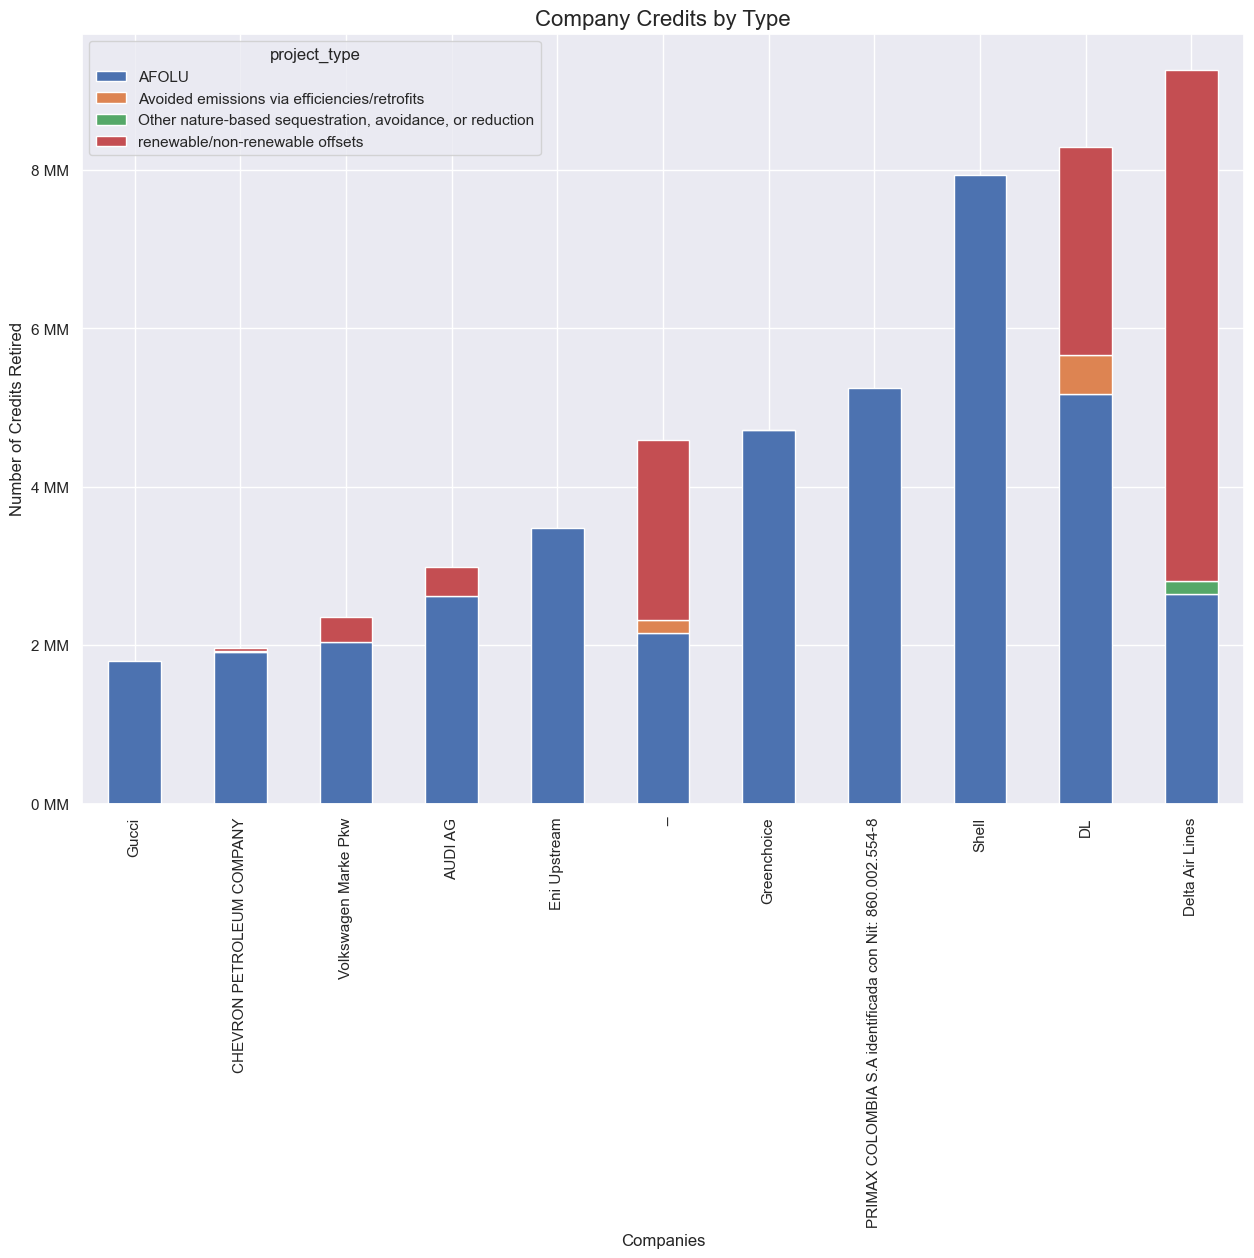

In [160]:
sns.set(style="darkgrid")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

#create stacked bar chart
plot = test6.set_index('retirement_beneficiary').plot(kind='bar', stacked=True)

#add overall title
plt.title('Company Credits by Type', fontsize=16)

#update y axis from scientific notation
plot.ticklabel_format(style='plain', scilimits=(0,20), axis='y')
ylabels = ['{:,.0f}'.format(y) + ' MM' for y in plot.get_yticks()/1000000]
plot.set_yticklabels(ylabels)

#add axis titles
plt.xlabel('Companies')
plt.ylabel('Number of Credits Retired')

Text(0, 0.5, 'Number of Credits Retired')

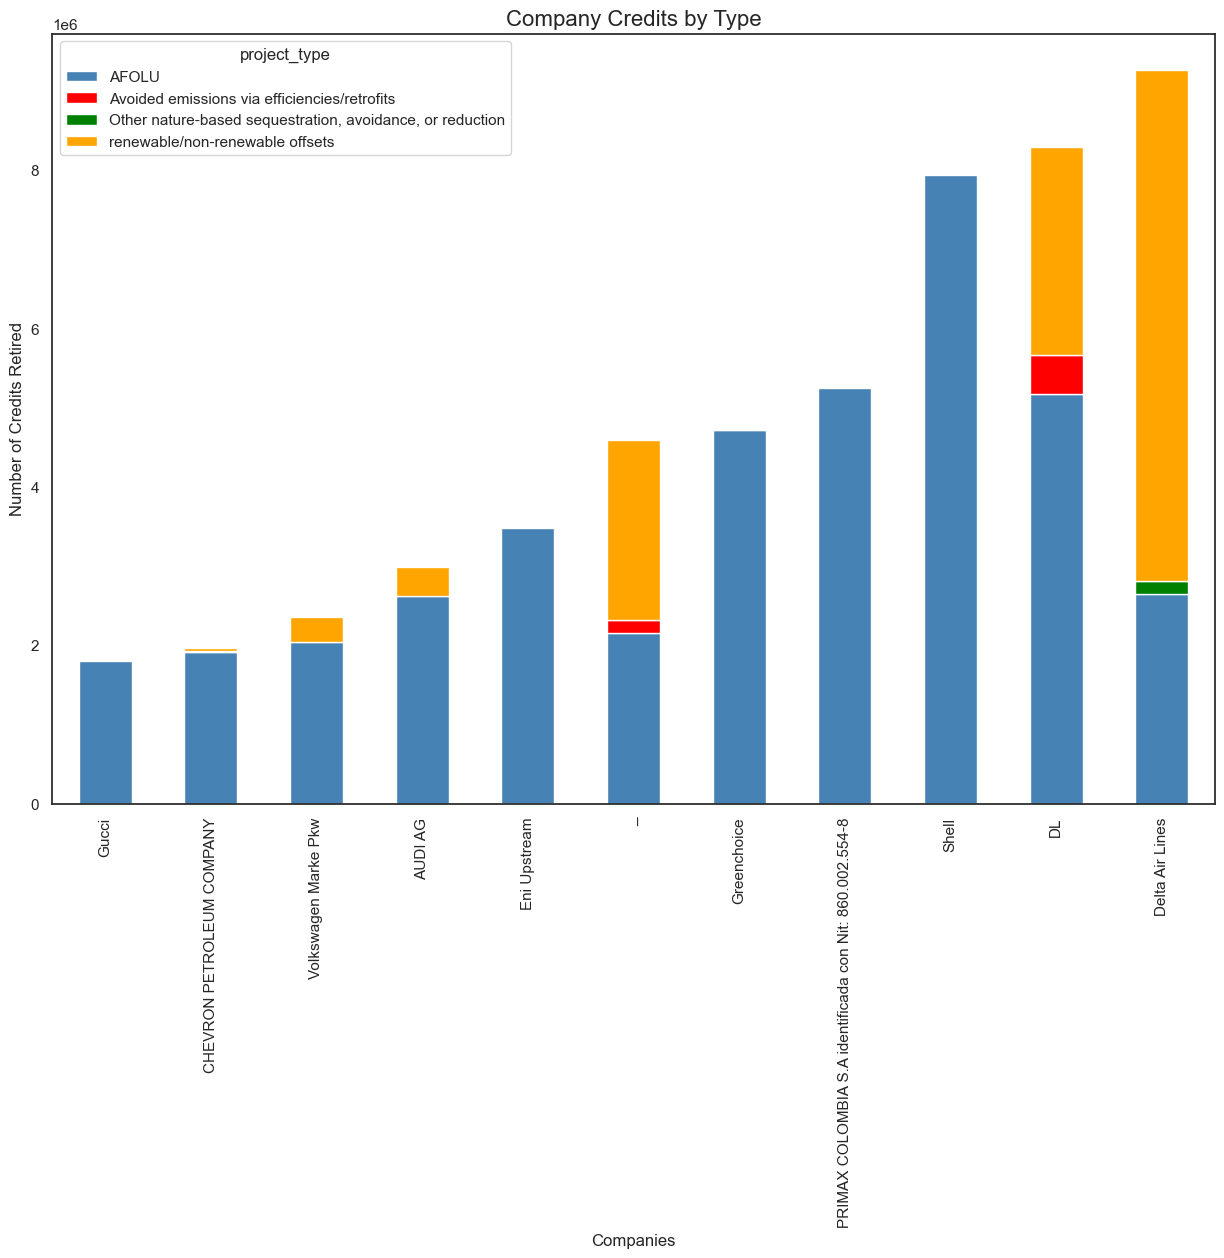

In [162]:
sns.set(style='white')

#create stacked bar chart
test6.set_index('retirement_beneficiary').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green', 'orange'])

#add overall title
plt.title('Company Credits by Type', fontsize=16)

#add axis titles
plt.xlabel('Companies')
plt.ylabel('Number of Credits Retired')